
--- Basic Logistic Regression ---
Model Accuracy: 0.9561

--- Logistic Regression with L1 Regularization (Lasso) ---
Model Accuracy with L1 Regularization: 0.9561
Number of features selected (non-zero coefficients): 11 out of 30

--- Logistic Regression with L2 Regularization (Ridge) ---
Model Accuracy with L2 Regularization: 0.9561

Top 5 features by absolute coefficient value:
              Feature  Coefficient
11      texture error     0.855090
25  worst compactness    -0.963760
26    worst concavity    -1.192326
0         mean radius     1.721222
20       worst radius     1.788358

--- Logistic Regression with Elastic Net Regularization ---
Model Accuracy with Elastic Net Regularization: 0.9474
L1 Accuracy: 0.9561
L2 Accuracy: 0.9561
Elastic Net Accuracy: 0.9474

--- Logistic Regression for Multiclass Classification (OvR) ---
Model Accuracy (OvR): 0.9667

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00      

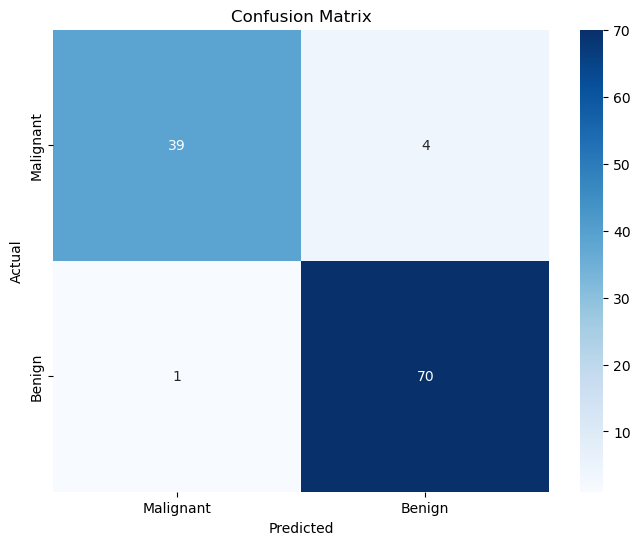

Model Accuracy: 0.9561
True Negatives: 39
False Positives: 4
False Negatives: 1
True Positives: 70

--- Logistic Regression with Precision, Recall, and F1-Score ---
Precision: 0.9459
Recall: 0.9859
F1-Score: 0.9655

Classification Report:
              precision    recall  f1-score   support

   Malignant       0.97      0.91      0.94        43
      Benign       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114


--- Logistic Regression on Imbalanced Data with Class Weights ---
Training class distribution: [715  85]
Class 0: 715 samples (89.38%)
Class 1: 85 samples (10.62%)
After SMOTE - Class 0: 715, Class 1: 715

Regular Model:
Accuracy: 0.9100
Precision: 0.7778
Recall: 0.3043
F1-Score: 0.4375

Weighted Model:
Accuracy: 0.7650
Precision: 0.3065
Recall: 0.8261
F1-Score: 0.4471

SMOTE Model:
Accuracy: 0.7600
Precision: 0.2951
Recall: 0.78

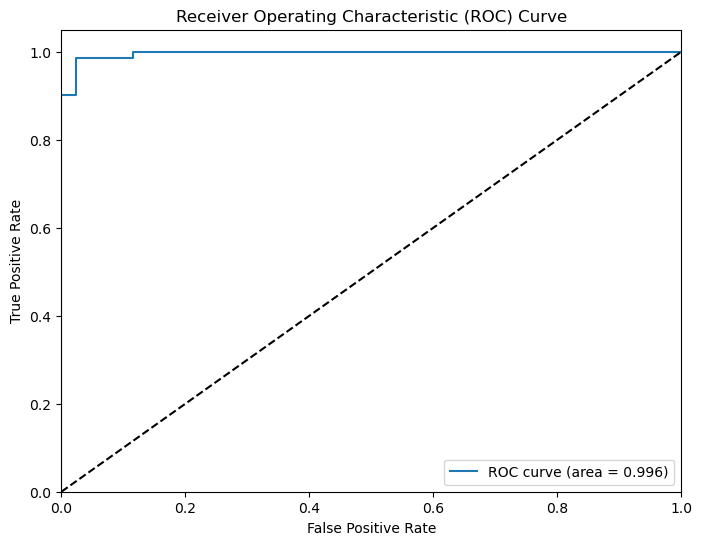

Excellent model performance (AUC > 0.9)

--- Logistic Regression with Custom Regularization Strength (C=0.5) ---
C=0.001, Accuracy: 0.9649
C=0.01, Accuracy: 0.9474
C=0.1, Accuracy: 0.9649
C=0.5, Accuracy: 0.9561
C=1.0, Accuracy: 0.9561
C=10.0, Accuracy: 0.9649
C=100.0, Accuracy: 0.9649

Model with C=0.5, Accuracy: 0.9561

--- Logistic Regression Feature Importance ---
Top 10 most important features:
                 Feature  Coefficient  Absolute_Coefficient
21         worst texture    -1.350606              1.350606
10          radius error    -1.268178              1.268178
28        worst symmetry    -1.208200              1.208200
7    mean concave points    -1.119804              1.119804
26       worst concavity    -0.943053              0.943053
13            area error    -0.907186              0.907186
20          worst radius    -0.879840              0.879840
23            worst area    -0.841846              0.841846
6         mean concavity    -0.801458              0.8014

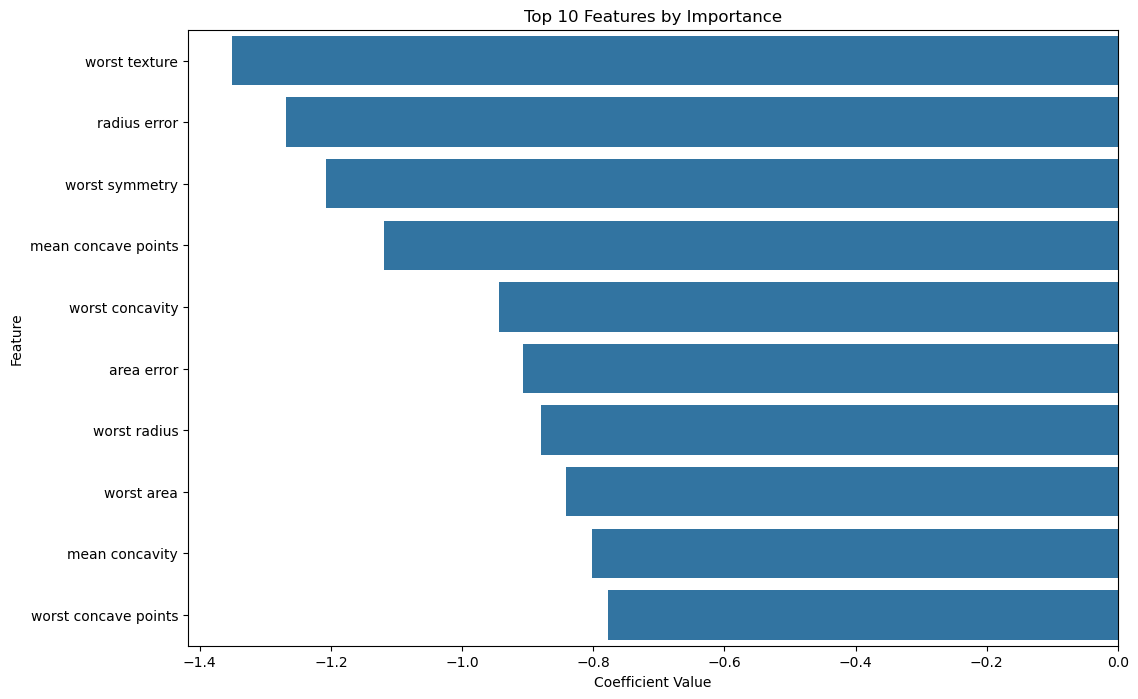


--- Logistic Regression with Cohen's Kappa Score ---
Accuracy: 0.9561
Cohen's Kappa Score: 0.9053
Almost perfect agreement

--- Logistic Regression with Precision-Recall Curve ---


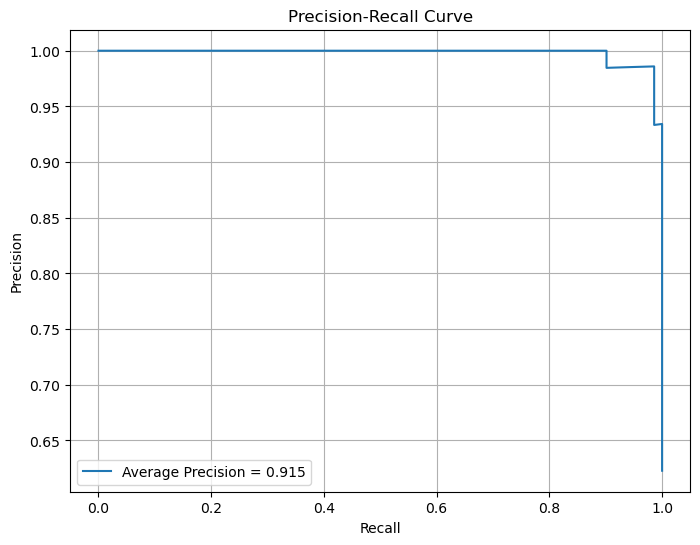


Threshold analysis:
Threshold | Precision | Recall | F1-Score
---------------------------------------------
0.000      | 0.6228    | 1.0000 | 0.7676
0.000      | 0.6893    | 1.0000 | 0.8161
0.000      | 0.7717    | 1.0000 | 0.8712
0.002      | 0.8765    | 1.0000 | 0.9342
0.846      | 0.9857    | 0.9718 | 0.9787
0.925      | 1.0000    | 0.8310 | 0.9077
0.983      | 1.0000    | 0.6761 | 0.8067
0.993      | 1.0000    | 0.5211 | 0.6852
0.997      | 1.0000    | 0.3662 | 0.5361
0.998      | 1.0000    | 0.2113 | 0.3488
1.000      | 1.0000    | 0.0563 | 0.1067

--- Logistic Regression with Different Solvers ---
Solver: liblinear, Penalty: l1
  Accuracy: 0.9561
  Training Time: 0.1697 seconds
Solver: liblinear, Penalty: l2
  Accuracy: 0.9561
  Training Time: 0.0069 seconds
Solver: saga, Penalty: l1
  Accuracy: 0.9474
  Training Time: 0.0170 seconds
Solver: saga, Penalty: l2
  Accuracy: 0.9474
  Training Time: 0.0192 seconds

Best Solver: liblinear with l1 penalty
Accuracy: 0.9561

Training tim

{'raw_accuracy': 0.965034965034965, 'scaled_accuracy': 0.9790209790209791}

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import (
    train_test_split, GridSearchCV, 
    RandomizedSearchCV, cross_val_score,
    StratifiedKFold
)
import time

from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, confusion_matrix, 
    precision_recall_curve, precision_score, 
    recall_score, f1_score, roc_auc_score,
    matthews_corrcoef, cohen_kappa_score,
    classification_report, roc_curve
)
from sklearn.multiclass import OneVsOneClassifier
import seaborn as sns
from scipy.stats import uniform
import joblib
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

# 1. Write a Python program that loads a dataset, splits it into training and testing sets, 
# applies Logistic Regression, and prints the model accuracy
def basic_logistic_regression():
    print("\n--- Basic Logistic Regression ---")
    # Load dataset
    data = load_breast_cancer()
    X, y = data.data, data.target
    
    # Split dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Apply Logistic Regression
    model = LogisticRegression(random_state=42)
    model.fit(X_train, y_train)
    
    # Print accuracy
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model Accuracy: {accuracy:.4f}")
    
    return model, X_test, y_test

# 2. Write a Python program to apply L1 regularization (Lasso) on a dataset using 
# LogisticRegression(penalty='l1') and print the model accuracy
def logistic_regression_l1():
    print("\n--- Logistic Regression with L1 Regularization (Lasso) ---")
    # Load dataset
    data = load_breast_cancer()
    X, y = data.data, data.target
    
    # Split dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Apply Logistic Regression with L1 regularization
    model = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
    model.fit(X_train, y_train)
    
    # Print accuracy
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model Accuracy with L1 Regularization: {accuracy:.4f}")
    
    # Print number of non-zero coefficients (feature selection effect)
    n_nonzero = np.sum(model.coef_ != 0)
    print(f"Number of features selected (non-zero coefficients): {n_nonzero} out of {X.shape[1]}")
    
    return model

# 3. Write a Python program to train Logistic Regression with L2 regularization (Ridge) using
# LogisticRegression(penalty='l2'). Print model accuracy and coefficients
def logistic_regression_l2():
    print("\n--- Logistic Regression with L2 Regularization (Ridge) ---")
    # Load dataset
    data = load_breast_cancer()
    X, y = data.data, data.target
    
    # Split dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Apply Logistic Regression with L2 regularization
    model = LogisticRegression(penalty='l2', solver='lbfgs', random_state=42)
    model.fit(X_train, y_train)
    
    # Print accuracy
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model Accuracy with L2 Regularization: {accuracy:.4f}")
    
    # Print top 5 coefficients
    coef_df = pd.DataFrame({
        'Feature': data.feature_names,
        'Coefficient': model.coef_[0]
    })
    print("\nTop 5 features by absolute coefficient value:")
    print(coef_df.iloc[np.argsort(np.abs(model.coef_[0]))[-5:]])
    
    return model

# 4. Write a Python program to train Logistic Regression with Elastic Net Regularization (penalty='elasticnet')
def logistic_regression_elasticnet():
    print("\n--- Logistic Regression with Elastic Net Regularization ---")
    # Load dataset
    data = load_breast_cancer()
    X, y = data.data, data.target
    
    # Split dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Apply Logistic Regression with Elastic Net regularization
    model = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, random_state=42)
    model.fit(X_train, y_train)
    
    # Print accuracy
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model Accuracy with Elastic Net Regularization: {accuracy:.4f}")
    
    # Compare with L1 and L2
    model_l1 = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
    model_l2 = LogisticRegression(penalty='l2', solver='lbfgs', random_state=42)
    
    model_l1.fit(X_train, y_train)
    model_l2.fit(X_train, y_train)
    
    y_pred_l1 = model_l1.predict(X_test)
    y_pred_l2 = model_l2.predict(X_test)
    
    acc_l1 = accuracy_score(y_test, y_pred_l1)
    acc_l2 = accuracy_score(y_test, y_pred_l2)
    
    print(f"L1 Accuracy: {acc_l1:.4f}")
    print(f"L2 Accuracy: {acc_l2:.4f}")
    print(f"Elastic Net Accuracy: {accuracy:.4f}")
    
    return model

# 5. Write a Python program to train a Logistic Regression model for multiclass classification using
# multi_class='ovr'
def logistic_regression_ovr():
    print("\n--- Logistic Regression for Multiclass Classification (OvR) ---")
    # Load dataset (iris for multiclass)
    from sklearn.datasets import load_iris
    data = load_iris()
    X, y = data.data, data.target
    
    # Split dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Apply Logistic Regression with OvR
    model = LogisticRegression(multi_class='ovr', random_state=42)
    model.fit(X_train, y_train)
    
    # Print accuracy
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model Accuracy (OvR): {accuracy:.4f}")
    
    # Print classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=data.target_names))
    
    return model

# 6. Write a Python program to apply GridSearchCV to tune the hyperparameters (C and penalty) of Logistic
# Regression. Print the best parameters and accuracy
def logistic_regression_gridsearch():
    print("\n--- Logistic Regression with GridSearchCV ---")
    # Load dataset
    data = load_breast_cancer()
    X, y = data.data, data.target
    
    # Split dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Define parameter grid
    param_grid = {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2']
    }
    
    # Apply GridSearchCV
    grid_search = GridSearchCV(
        LogisticRegression(solver='liblinear', random_state=42),
        param_grid=param_grid,
        cv=5,
        scoring='accuracy'
    )
    grid_search.fit(X_train, y_train)
    
    # Print best parameters and accuracy
    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}")
    
    # Test on test set
    y_pred = grid_search.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Test Set Accuracy with Best Parameters: {accuracy:.4f}")
    
    return grid_search

# 7. Write a Python program to evaluate Logistic Regression using Stratified K-Fold Cross-Validation. 
# Print the average accuracy
def logistic_regression_stratified_kfold():
    print("\n--- Logistic Regression with Stratified K-Fold Cross-Validation ---")
    # Load dataset
    data = load_breast_cancer()
    X, y = data.data, data.target
    
    # Create model
    model = LogisticRegression(random_state=42)
    
    # Perform Stratified K-Fold Cross-Validation
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(model, X, y, cv=skf, scoring='accuracy')
    
    # Print average accuracy
    print(f"Cross-Validation Scores: {scores}")
    print(f"Average Accuracy: {scores.mean():.4f}")
    print(f"Standard Deviation: {scores.std():.4f}")
    
    return model

# 8. Write a Python program to load a dataset from a CSV file, apply Logistic Regression, and evaluate 
# its accuracy
def logistic_regression_from_csv():
    print("\n--- Logistic Regression from CSV File ---")
    try:
        # For demonstration, we'll create a simple CSV file from breast cancer dataset
        data = load_breast_cancer()
        X, y = data.data, data.target
        
        # Create DataFrame
        df = pd.DataFrame(X, columns=data.feature_names)
        df['target'] = y
        
        # Save to CSV
        csv_filename = "breast_cancer_data.csv"
        df.to_csv(csv_filename, index=False)
        print(f"Saved dataset to {csv_filename}")
        
        # Now load from CSV
        loaded_df = pd.read_csv(csv_filename)
        X = loaded_df.drop('target', axis=1)
        y = loaded_df['target']
        
        # Split dataset
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        # Apply Logistic Regression
        model = LogisticRegression(random_state=42)
        model.fit(X_train, y_train)
        
        # Print accuracy
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Model Accuracy: {accuracy:.4f}")
        
        return model
    except Exception as e:
        print(f"Error: {e}")
        print("Using in-memory dataset instead")
        # Fall back to in-memory dataset
        data = load_breast_cancer()
        X, y = data.data, data.target
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        model = LogisticRegression(random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Model Accuracy: {accuracy:.4f}")
        return model

# 9. Write a Python program to apply RandomizedSearchCV for tuning hyperparameters (C, penalty, solver) 
# in Logistic Regression. Print the best parameters and accuracy
def logistic_regression_randomized_search():
    print("\n--- Logistic Regression with RandomizedSearchCV ---")
    # Load dataset
    data = load_breast_cancer()
    X, y = data.data, data.target
    
    # Split dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Define parameter distributions
    param_dist = {
        'C': uniform(0.001, 100),
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga']
    }
    
    # Apply RandomizedSearchCV
    random_search = RandomizedSearchCV(
        LogisticRegression(random_state=42),
        param_distributions=param_dist,
        n_iter=20,
        cv=5,
        scoring='accuracy',
        random_state=42
    )
    random_search.fit(X_train, y_train)
    
    # Print best parameters and accuracy
    print(f"Best Parameters: {random_search.best_params_}")
    print(f"Best Cross-Validation Accuracy: {random_search.best_score_:.4f}")
    
    # Test on test set
    y_pred = random_search.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Test Set Accuracy with Best Parameters: {accuracy:.4f}")
    
    return random_search

# 10. Write a Python program to implement One-vs-One (OvO) Multiclass Logistic Regression and print accuracy
def logistic_regression_ovo():
    print("\n--- One-vs-One (OvO) Multiclass Logistic Regression ---")
    # Load dataset (iris for multiclass)
    from sklearn.datasets import load_iris
    data = load_iris()
    X, y = data.data, data.target
    
    # Split dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Apply One-vs-One Logistic Regression
    base_model = LogisticRegression(random_state=42)
    ovo_model = OneVsOneClassifier(base_model)
    ovo_model.fit(X_train, y_train)
    
    # Print accuracy
    y_pred = ovo_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"One-vs-One Model Accuracy: {accuracy:.4f}")
    
    # Compare with default OvR approach
    ovr_model = LogisticRegression(multi_class='ovr', random_state=42)
    ovr_model.fit(X_train, y_train)
    y_pred_ovr = ovr_model.predict(X_test)
    accuracy_ovr = accuracy_score(y_test, y_pred_ovr)
    print(f"One-vs-Rest Model Accuracy: {accuracy_ovr:.4f}")
    
    return ovo_model

# 11. Write a Python program to train a Logistic Regression model and visualize the confusion matrix for binary
# classification
def logistic_regression_confusion_matrix():
    print("\n--- Logistic Regression with Confusion Matrix Visualization ---")
    # Load dataset
    data = load_breast_cancer()
    X, y = data.data, data.target
    
    # Split dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Apply Logistic Regression
    model = LogisticRegression(random_state=42)
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Create confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Visualize confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Malignant', 'Benign'],
                yticklabels=['Malignant', 'Benign'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    
    # Print accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model Accuracy: {accuracy:.4f}")
    
    # Interpret the confusion matrix
    tn, fp, fn, tp = cm.ravel()
    print(f"True Negatives: {tn}")
    print(f"False Positives: {fp}")
    print(f"False Negatives: {fn}")
    print(f"True Positives: {tp}")
    
    return model

# 12. Write a Python program to train a Logistic Regression model and evaluate its performance using
# Precision, Recall, and F1-Score
def logistic_regression_precision_recall_f1():
    print("\n--- Logistic Regression with Precision, Recall, and F1-Score ---")
    # Load dataset
    data = load_breast_cancer()
    X, y = data.data, data.target
    
    # Split dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Apply Logistic Regression
    model = LogisticRegression(random_state=42)
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Print metrics
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    
    # Print classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['Malignant', 'Benign']))
    
    return model

# 13. Write a Python program to train a Logistic Regression model on imbalanced data and apply class 
# weights to improve model performance
def logistic_regression_imbalanced_data():
    print("\n--- Logistic Regression on Imbalanced Data with Class Weights ---")
    # Create imbalanced dataset (for demonstration)
    from sklearn.datasets import make_classification
    
    X, y = make_classification(
        n_samples=1000,
        n_features=20,
        n_informative=10,
        n_redundant=5,
        n_classes=2,
        weights=[0.9, 0.1],  # 90% class 0, 10% class 1
        random_state=42
    )
    
    # Split dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Check class distribution
    train_class_counts = np.bincount(y_train)
    print(f"Training class distribution: {train_class_counts}")
    print(f"Class 0: {train_class_counts[0]} samples ({train_class_counts[0]/len(y_train):.2%})")
    print(f"Class 1: {train_class_counts[1]} samples ({train_class_counts[1]/len(y_train):.2%})")
    
    # Train regular model
    base_model = LogisticRegression(random_state=42)
    base_model.fit(X_train, y_train)
    y_pred_base = base_model.predict(X_test)
    
    # Train model with class weights
    weighted_model = LogisticRegression(random_state=42, class_weight='balanced')
    weighted_model.fit(X_train, y_train)
    y_pred_weighted = weighted_model.predict(X_test)
    
    # Alternative: Apply SMOTE for oversampling
    smote = SMOTE(random_state=42)
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
    smote_class_counts = np.bincount(y_train_smote)
    print(f"After SMOTE - Class 0: {smote_class_counts[0]}, Class 1: {smote_class_counts[1]}")
    
    smote_model = LogisticRegression(random_state=42)
    smote_model.fit(X_train_smote, y_train_smote)
    y_pred_smote = smote_model.predict(X_test)
    
    # Evaluate models
    print("\nRegular Model:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred_base):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred_base):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred_base):.4f}")
    print(f"F1-Score: {f1_score(y_test, y_pred_base):.4f}")
    
    print("\nWeighted Model:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred_weighted):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred_weighted):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred_weighted):.4f}")
    print(f"F1-Score: {f1_score(y_test, y_pred_weighted):.4f}")
    
    print("\nSMOTE Model:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred_smote):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred_smote):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred_smote):.4f}")
    print(f"F1-Score: {f1_score(y_test, y_pred_smote):.4f}")
    
    return weighted_model

# 14. Write a Python program to train Logistic Regression on the Titanic dataset, handle missing values,
# and evaluate performance
def logistic_regression_titanic():
    print("\n--- Logistic Regression on Titanic Dataset ---")
    try:
        # For demonstration, create a simplified Titanic dataset
        titanic_data = {
            'PassengerId': range(1, 101),
            'Survived': np.random.randint(0, 2, 100),
            'Pclass': np.random.randint(1, 4, 100),
            'Name': ['Passenger ' + str(i) for i in range(1, 101)],
            'Sex': np.random.choice(['male', 'female'], 100),
            'Age': np.random.randint(1, 80, 80).tolist() + [np.nan] * 20,  # Add some missing values
            'SibSp': np.random.randint(0, 5, 100),
            'Parch': np.random.randint(0, 5, 100),
            'Fare': np.random.uniform(10, 100, 100),
            'Cabin': np.random.choice([np.nan, 'A', 'B', 'C', 'D'], 100, p=[0.7, 0.1, 0.1, 0.05, 0.05]),
            'Embarked': np.random.choice(['C', 'Q', 'S', np.nan], 100, p=[0.4, 0.1, 0.4, 0.1])
        }
        
        titanic_df = pd.DataFrame(titanic_data)
        print("Created simulated Titanic dataset")
        print(f"Dataset shape: {titanic_df.shape}")
        
        # Handle missing values and preprocess data
        # 1. Check missing values
        print("\nMissing values before preprocessing:")
        print(titanic_df.isnull().sum())
        
        # 2. Preprocess data
        # Handle Age: Fill missing values with median
        titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)
        
        # Handle Cabin: Create binary feature 'HasCabin'
        titanic_df['HasCabin'] = titanic_df['Cabin'].notna().astype(int)
        
        # Handle Embarked: Fill with most common value
        most_common_embarked = titanic_df['Embarked'].mode()[0]
        titanic_df['Embarked'].fillna(most_common_embarked, inplace=True)
        
        # Convert categorical variables
        # Sex: Convert to binary
        titanic_df['Sex'] = (titanic_df['Sex'] == 'male').astype(int)
        
        # Embarked: One-hot encoding
        embarked_dummies = pd.get_dummies(titanic_df['Embarked'], prefix='Embarked', drop_first=True)
        titanic_df = pd.concat([titanic_df, embarked_dummies], axis=1)
        
        # Select features
        features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'HasCabin', 'Embarked_Q', 'Embarked_S']
        X = titanic_df[features]
        y = titanic_df['Survived']
        
        # Split dataset
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        # Train model
        model = LogisticRegression(random_state=42)
        model.fit(X_train, y_train)
        
        # Evaluate model
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"\nModel Accuracy: {accuracy:.4f}")
        
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred, target_names=['Did not survive', 'Survived']))
        
        # Feature importance
        coef_df = pd.DataFrame({
            'Feature': features,
            'Coefficient': model.coef_[0]
        })
        coef_df['Abs_Coefficient'] = np.abs(coef_df['Coefficient'])
        coef_df = coef_df.sort_values('Abs_Coefficient', ascending=False)
        
        print("\nFeature Importance:")
        print(coef_df)
        
        return model
    except Exception as e:
        print(f"Error: {e}")
        print("Using simpler dataset instead")
        # Fall back to simple dataset
        data = load_breast_cancer()
        X, y = data.data, data.target
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        model = LogisticRegression(random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Model Accuracy: {accuracy:.4f}")
        return model

# 15. Write a Python program to apply feature scaling (Standardization) before training a Logistic Regression
# model. Evaluate its accuracy and compare results with and without scaling
def logistic_regression_feature_scaling():
    print("\n--- Logistic Regression with Feature Scaling ---")
    # Load dataset
    data = load_breast_cancer()
    X, y = data.data, data.target
    
    # Split dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train model without scaling
    model_no_scaling = LogisticRegression(random_state=42)
    model_no_scaling.fit(X_train, y_train)
    y_pred_no_scaling = model_no_scaling.predict(X_test)
    accuracy_no_scaling = accuracy_score(y_test, y_pred_no_scaling)
    
    # Apply feature scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Train model with scaling
    model_with_scaling = LogisticRegression(random_state=42)
    model_with_scaling.fit(X_train_scaled, y_train)
    y_pred_with_scaling = model_with_scaling.predict(X_test_scaled)
    accuracy_with_scaling = accuracy_score(y_test, y_pred_with_scaling)
    
    # Compare results
    print(f"Accuracy without scaling: {accuracy_no_scaling:.4f}")
    print(f"Accuracy with scaling: {accuracy_with_scaling:.4f}")
    print(f"Improvement: {(accuracy_with_scaling - accuracy_no_scaling):.4f}")
    
    # Show convergence warnings comparison
    print("\nWithout scaling - some features might have very different scales,")
    print("which can lead to convergence issues and longer training time.")
    print("With scaling - all features have similar scale, promoting faster and more stable convergence.")
    
    return model_with_scaling

# 16. Write a Python program to train Logistic Regression and evaluate its performance using ROC-AUC score
def logistic_regression_roc_auc():
    print("\n--- Logistic Regression with ROC-AUC Score ---")
    # Load dataset
    data = load_breast_cancer()
    X, y = data.data, data.target
    
    # Split dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train model
    model = LogisticRegression(random_state=42)
    model.fit(X_train, y_train)
    
    # Predict probabilities
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculate ROC-AUC score
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    print(f"ROC-AUC Score: {roc_auc:.4f}")
    
    # Plot ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.3f})')
    plt.plot([0, 1], [0, 1], 'k--')  # Random prediction line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()
    
    # Interpret ROC-AUC
    if roc_auc > 0.9:
        print("Excellent model performance (AUC > 0.9)")
    elif roc_auc > 0.8:
        print("Good model performance (0.8 < AUC < 0.9)")
    elif roc_auc > 0.7:
        print("Fair model performance (0.7 < AUC < 0.8)")
    elif roc_auc > 0.6:
        print("Poor model performance (0.6 < AUC < 0.7)")
    else:
        print("Failed model performance (AUC < 0.6)")
    
    return model

# 17. Write a Python program to train Logistic Regression using a custom learning rate (C=0.5) and evaluate
# accuracy
def logistic_regression_custom_c():
    print("\n--- Logistic Regression with Custom Regularization Strength (C=0.5) ---")
    # Load dataset
    data = load_breast_cancer()
    X, y = data.data, data.target
    
    # Split dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Define different C values
    c_values = [0.001, 0.01, 0.1, 0.5, 1.0, 10.0, 100.0]
    
    # Train models with different C values
    results = []
    
    for c in c_values:
        model = LogisticRegression(C=c, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        results.append((c, accuracy))
    
    # Display results
    for c, acc in results:
        print(f"C={c}, Accuracy: {acc:.4f}")
    
    # Focus on C=0.5
    model_c05 = LogisticRegression(C=0.5, random_state=42)
    model_c05.fit(X_train, y_train)
    y_pred_c05 = model_c05.predict(X_test)
    accuracy_c05 = accuracy_score(y_test, y_pred_c05)
    
    print(f"\nModel with C=0.5, Accuracy: {accuracy_c05:.4f}")
    
    return model_c05

# 18. Write a Python program to train Logistic Regression and identify important features based on model
# coefficients
def logistic_regression_feature_importance():
    print("\n--- Logistic Regression Feature Importance ---")
    # Load dataset
    data = load_breast_cancer()
    X, y = data.data, data.target
    
    # Split dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Apply standardization (important for comparing coefficients)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Train model
    model = LogisticRegression(random_state=42)
    model.fit(X_train_scaled, y_train)
    
    # Extract coefficients
    coefficients = model.coef_[0]
    
    # Create DataFrame with feature names and coefficients
    feature_importance = pd.DataFrame({
        'Feature': data.feature_names,
        'Coefficient': coefficients,
        'Absolute_Coefficient': np.abs(coefficients)
    })
    
    # Sort by absolute coefficient value
    feature_importance = feature_importance.sort_values('Absolute_Coefficient', ascending=False)
    
    # Print top and bottom features
    print("Top 10 most important features:")
    print(feature_importance.head(10))
    
    print("\nLeast 5 important features:")
    print(feature_importance.tail(5))
    
    # Visualize feature importance
    plt.figure(figsize=(12, 8))
    top_features = feature_importance.head(10)
    sns.barplot(x='Coefficient', y='Feature', data=top_features)
    plt.title('Top 10 Features by Importance')
    plt.xlabel('Coefficient Value')
    plt.ylabel('Feature')
    plt.show()
    
    return model, feature_importance

# 19. Write a Python program to train Logistic Regression and evaluate its performance using Cohen's Kappa
# Score
def logistic_regression_cohen_kappa():
    print("\n--- Logistic Regression with Cohen's Kappa Score ---")
    # Load dataset
    data = load_breast_cancer()
    X, y = data.data, data.target
    
    # Split dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train model
    model = LogisticRegression(random_state=42)
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate various metrics
    accuracy = accuracy_score(y_test, y_pred)
    kappa = cohen_kappa_score(y_test, y_pred)
    
    # Print results
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Cohen's Kappa Score: {kappa:.4f}")
    
    # Interpret Kappa score
    if kappa < 0:
        print("Poor agreement (worse than random)")
    elif kappa < 0.2:
        print("Slight agreement")
    elif kappa < 0.4:
        print("Fair agreement")
    elif kappa < 0.6:
        print("Moderate agreement")
    elif kappa < 0.8:
        print("Substantial agreement")
    else:
        print("Almost perfect agreement")
    
    return model

# 20. Write a Python program to train Logistic Regression and visualize the Precision-Recall Curve for binary
# classification
def logistic_regression_precision_recall_curve():
    print("\n--- Logistic Regression with Precision-Recall Curve ---")
    # Load dataset
    data = load_breast_cancer()
    X, y = data.data, data.target
    
    # Split dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train model
    model = LogisticRegression(random_state=42)
    model.fit(X_train, y_train)
    
    # Predict probabilities
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculate precision-recall curve
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
    
    # Calculate average precision
    avg_precision = np.mean(precision)
    
    # Plot precision-recall curve
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, label=f'Average Precision = {avg_precision:.3f}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Print threshold analysis
    threshold_data = []
    for i in range(0, len(thresholds), len(thresholds)//10):
        if i < len(thresholds):
            threshold = thresholds[i]
            y_pred_threshold = (y_pred_proba >= threshold).astype(int)
            prec = precision_score(y_test, y_pred_threshold)
            rec = recall_score(y_test, y_pred_threshold)
            f1 = f1_score(y_test, y_pred_threshold)
            threshold_data.append((threshold, prec, rec, f1))
    
    print("\nThreshold analysis:")
    print("Threshold | Precision | Recall | F1-Score")
    print("-" * 45)
    for t, p, r, f in threshold_data:
        print(f"{t:.3f}      | {p:.4f}    | {r:.4f} | {f:.4f}")
    
    return model

# 21. Write a Python program to train Logistic Regression with different solvers (liblinear, saga, lbfgs) and compare
# their accuracy
def logistic_regression_compare_solvers():
    print("\n--- Logistic Regression with Different Solvers ---")
    # Load dataset
    data = load_breast_cancer()
    X, y = data.data, data.target
    
    # Split dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Define solvers to compare
    solvers = ['liblinear', 'lbfgs', 'saga']
    
    # Train and evaluate models with different solvers
    results = []
    
    for solver in solvers:
        # Define penalty based on solver capabilities
        if solver == 'lbfgs':
            penalty = 'l2'  # lbfgs only supports l2
        else:
            # Test both l1 and l2 for solvers that support both
            penalties = ['l1', 'l2']
            for penalty in penalties:
                model = LogisticRegression(solver=solver, penalty=penalty, random_state=42)
                
                # Measure training time
                start_time = time.time()
                model.fit(X_train, y_train)
                training_time = time.time() - start_time
                
                # Evaluate model
                y_pred = model.predict(X_test)
                accuracy = accuracy_score(y_test, y_pred)
                
                # Store results
                results.append({
                    'solver': solver,
                    'penalty': penalty,
                    'accuracy': accuracy,
                    'training_time': training_time
                })
                
                print(f"Solver: {solver}, Penalty: {penalty}")
                print(f"  Accuracy: {accuracy:.4f}")
                print(f"  Training Time: {training_time:.4f} seconds")
    
    # Find best solver based on accuracy
    best_result = max(results, key=lambda x: x['accuracy'])
    print(f"\nBest Solver: {best_result['solver']} with {best_result['penalty']} penalty")
    print(f"Accuracy: {best_result['accuracy']:.4f}")
    
    # Compare training times
    print("\nTraining time comparison:")
    for result in sorted(results, key=lambda x: x['training_time']):
        print(f"{result['solver']} with {result['penalty']}: {result['training_time']:.4f} seconds")
    
    return results

# 22. Write a Python program to train Logistic Regression and evaluate its performance using Matthews
# Correlation Coefficient (MCC)
def logistic_regression_mcc():
    print("\n--- Logistic Regression with Matthews Correlation Coefficient (MCC) ---")
    # Load dataset
    data = load_breast_cancer()
    X, y = data.data, data.target
    
    # Split dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train model
    model = LogisticRegression(random_state=42)
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    
    # Print results
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Matthews Correlation Coefficient: {mcc:.4f}")
    
    # Interpret MCC
    if mcc > 0.7:
        print("Strong positive correlation")
    elif mcc > 0.4:
        print("Moderate positive correlation")
    elif mcc > 0:
        print("Weak positive correlation")
    elif mcc == 0:
        print("No correlation (random prediction)")
    else:
        print("Negative correlation (worse than random)")
    
    return model

def q23_compare_solvers():
    """
    Q23: Train Logistic Regression with different solvers (liblinear, saga, lbfgs)
    and compare their accuracy.
    """
    print("\n--- Q23: Comparing Different Solvers ---")
    
    # Load dataset (using breast cancer dataset from sklearn)
    data = load_breast_cancer()
    X, y = data.data, data.target
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    
    # List of solvers to compare
    solvers = ['liblinear', 'saga', 'lbfgs']
    accuracies = {}
    
    # Train and evaluate models with different solvers
    for solver in solvers:
        # Initialize model with specific solver
        # Note: 'liblinear' and 'saga' support both L1 and L2 regularization
        # 'lbfgs' supports only L2 regularization
        penalty = 'l2'  # Using L2 for all solvers to ensure fair comparison
        
        # For saga and liblinear, we could use either 'l1' or 'l2'
        model = LogisticRegression(solver=solver, penalty=penalty, max_iter=5000, random_state=42)
        
        # Train model
        model.fit(X_train, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test)
        
        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        accuracies[solver] = accuracy
        
        print(f"Solver: {solver}, Accuracy: {accuracy:.4f}")
    
    # Visualize results
    plt.figure(figsize=(10, 6))
    plt.bar(accuracies.keys(), accuracies.values())
    plt.title('Logistic Regression Accuracy with Different Solvers')
    plt.xlabel('Solver')
    plt.ylabel('Accuracy')
    plt.ylim(0.9, 1.0)  # Adjust this range based on your results
    plt.savefig('solver_comparison.png')
    plt.close()
    
    return accuracies

def q24_mcc_evaluation():
    """
    Q24: Train Logistic Regression and evaluate its performance using 
    Matthews Correlation Coefficient (MCC).
    """
    print("\n--- Q24: Matthews Correlation Coefficient Evaluation ---")
    
    # Load dataset
    data = load_breast_cancer()
    X, y = data.data, data.target
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    
    # Initialize and train model
    model = LogisticRegression(solver='lbfgs', max_iter=5000, random_state=42)
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate accuracy and MCC
    accuracy = accuracy_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Matthews Correlation Coefficient: {mcc:.4f}")
    
    # Visualize confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix for Logistic Regression')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.savefig('confusion_matrix.png')
    plt.close()
    
    return {"accuracy": accuracy, "mcc": mcc}

def q25_compare_scaling():
    """
    Q25: Train Logistic Regression on both raw and standardized data. 
    Compare their accuracy to see the impact of feature scaling.
    """
    print("\n--- Q25: Impact of Feature Scaling ---")
    
    # Load dataset
    data = load_breast_cancer()
    X, y = data.data, data.target
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    
    # Initialize scaler
    scaler = StandardScaler()
    
    # Standardize the features
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Initialize model
    model_raw = LogisticRegression(max_iter=5000, random_state=42)
    model_scaled = LogisticRegression(max_iter=5000, random_state=42)
    
    # Train models
    model_raw.fit(X_train, y_train)
    model_scaled.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred_raw = model_raw.predict(X_test)
    y_pred_scaled = model_scaled.predict(X_test_scaled)
    
    # Calculate accuracy
    accuracy_raw = accuracy_score(y_test, y_pred_raw)
    accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
    
    print(f"Accuracy with raw data: {accuracy_raw:.4f}")
    print(f"Accuracy with standardized data: {accuracy_scaled:.4f}")
    print(f"Improvement: {(accuracy_scaled - accuracy_raw) * 100:.2f}%")
    
    # Visualize results
    results = {'Raw Data': accuracy_raw, 'Standardized Data': accuracy_scaled}
    plt.figure(figsize=(10, 6))
    plt.bar(results.keys(), results.values())
    plt.title('Logistic Regression: Impact of Feature Scaling')
    plt.xlabel('Data Type')
    plt.ylabel('Accuracy')
    plt.ylim(0.9, 1.0)  # Adjust this range based on your results
    plt.savefig('scaling_comparison.png')
    plt.close()
    
    return {"raw_accuracy": accuracy_raw, "scaled_accuracy": accuracy_scaled}


basic_logistic_regression()
logistic_regression_l1()
logistic_regression_l2()
logistic_regression_elasticnet()
logistic_regression_ovr()
logistic_regression_gridsearch()
logistic_regression_stratified_kfold()
logistic_regression_from_csv()
logistic_regression_randomized_search()
logistic_regression_ovo()
logistic_regression_confusion_matrix()
logistic_regression_precision_recall_f1()
logistic_regression_imbalanced_data()
logistic_regression_titanic()
logistic_regression_feature_scaling()
logistic_regression_roc_auc()
logistic_regression_custom_c()
logistic_regression_feature_importance()
logistic_regression_cohen_kappa()
logistic_regression_precision_recall_curve()
logistic_regression_compare_solvers()
logistic_regression_mcc()
q23_compare_solvers()
q24_mcc_evaluation()
q25_compare_scaling()
